# 1: Import các thư viện

In [ ]:
import pandas as pd # Đọc dữ liệu
import numpy as np # Xử lý dữ liệu
import matplotlib.pyplot as plt # Vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler # Chuẩn hóa dữ liệu
from keras.callbacks import EarlyStopping, ModelCheckpoint # Lưu lại mô hình huấn luyện tốt nhất
from tensorflow.keras.models import load_model # Tải mô hình

# Các lớp để xây dựng mô hình
from keras.models import Sequential # Đầu vào
from keras.layers import LSTM # Học phụ thuộc
from keras.layers import Dropout # Tránh học tủ
from keras.layers import Dense # Đầu ra

# Kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score # Đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error # Đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error # Đo % sai số tuyệt đối trung bình

# 2: Đọc dữ liệu

In [ ]:
# Cấp quyền truy cập google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đọc dữ liệu từ file csv
df = pd.read_csv('/content/drive/MyDrive/dataset/PNJ.csv')

# Drop dòng "Open Interest" không dùng đến trong dataset
df = df.drop(columns=["Open Interest"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

       Ticker         Date/Time   Open   High    Low  Close  Volume
0         PNJ    2/28/2018 9:15  78.14  78.99  78.14  78.99     270
1         PNJ    2/28/2018 9:16  78.94  78.94  78.94  78.94      10
2         PNJ    2/28/2018 9:19  78.14  78.14  78.14  78.14     283
3         PNJ    2/28/2018 9:20  78.14  78.14  78.14  78.14     480
4         PNJ    2/28/2018 9:21  78.14  78.14  78.14  78.14     146
...       ...               ...    ...    ...    ...    ...     ...
125304    PNJ  12/22/2020 14:22  78.20  78.20  78.20  78.20    5000
125305    PNJ  12/22/2020 14:23  78.20  78.20  78.20  78.20    1700
125306    PNJ  12/22/2020 14:24  78.20  78.20  78.20  78.20     870
125307    PNJ  12/22/2020 14:25  78.10  78.10  78.10  78.10   13000
125308    PNJ  12/22/2020 14:46  78.30  78.30  78.30  78.30    1500

[125309 rows x 7 columns]


# 3: Mô tả dữ liệu

In [ ]:
# Định dạng cấu trúc thời gian
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M")

In [ ]:
# Kích thước dữ liệu
df.shape

(125309, 7)

In [ ]:
# Dữ liệu 5 dòng đầu
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume
0,PNJ,2018-02-28 09:15:00,78.14,78.99,78.14,78.99,270
1,PNJ,2018-02-28 09:16:00,78.94,78.94,78.94,78.94,10
2,PNJ,2018-02-28 09:19:00,78.14,78.14,78.14,78.14,283
3,PNJ,2018-02-28 09:20:00,78.14,78.14,78.14,78.14,480
4,PNJ,2018-02-28 09:21:00,78.14,78.14,78.14,78.14,146


In [ ]:
# Xác định kiểu dữ liệu
df.info()

In [ ]:
# Mô tả bộ dữ liệu
df.describe()

# 4: Tiền xử lý dữ liệu

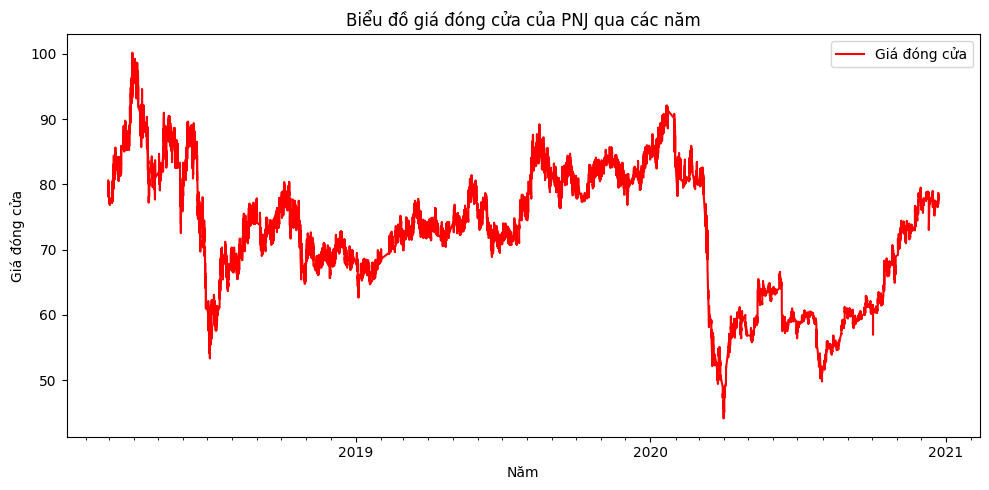

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi
# Chuyển đổi cột "Date/Time" sang dạng datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Date/Time')

# Chuyển đổi định dạng các cột giá thành số thực
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

# Lấy thông tin năm từ cột "Date/Time"
df['Year'] = df['Date/Time'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Date/Time'], df['Close'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của PNJ qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout() # Loại bỏ các giá trị trùng lặp
plt.show()

In [ ]:
df1 = pd.DataFrame(df,columns=['Date/Time','Close'])
df1.index = df1['Date/Time']
df1.drop('Date/Time', axis=1, inplace=True)
df1

,Close
Date/Time,
2018-02-28 09:15:00,78.99
2018-02-28 09:16:00,78.94
2018-02-28 09:19:00,78.14
2018-02-28 09:20:00,78.14
2018-02-28 09:21:00,78.14
...,...
2020-12-22 14:22:00,78.20
2020-12-22 14:23:00,78.20
2020-12-22 14:24:00,78.20


In [ ]:
# Chia tập dữ liệu: 80% để huấn luyện mô hình và 20% dùng để test
data = df1.values
num_rows = len(data)
train_size = int(0.8 * num_rows)

train_data = data[:train_size]
test_data = data[train_size:]

In [ ]:
data

array([[78.99],
       [78.94],
       [78.14],
       ...,
       [78.2 ],
       [78.1 ],
       [78.3 ]])

In [ ]:
# Chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)

In [ ]:
# Tạo vòng lặp các giá trị
x_train, y_train=[], []
for i in range(60, len(train_data)):
  x_train.append(sc_train[i-60:i, 0]) # Lấy 60 giá đóng cửa liên tục
  y_train.append(sc_train[i, 0]) # Lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train

[array([0.62209925, 0.62120671, 0.6069261 , 0.6069261 , 0.6069261 ,
        0.60603356, 0.6069261 , 0.6069261 , 0.61781507, 0.61781507,
        0.61781507, 0.61960014, 0.63887897, 0.61960014, 0.62031417,
        0.61960014, 0.61531596, 0.61103177, 0.65101749, 0.61192431,
        0.61960014, 0.61960014, 0.61960014, 0.61531596, 0.61531596,
        0.61531596, 0.61531596, 0.64584077, 0.61192431, 0.61031774,
        0.60942521, 0.60853267, 0.61031774, 0.60942521, 0.61031774,
        0.61031774, 0.63887897, 0.60853267, 0.61531596, 0.61103177,
        0.61531596, 0.61531596, 0.61960014, 0.61960014, 0.61960014,
        0.6162085 , 0.6162085 , 0.61710104, 0.6162085 , 0.6162085 ,
        0.61531596, 0.61531596, 0.64584077, 0.61710104, 0.61531596,
        0.61370939, 0.61370939, 0.61103177, 0.61531596, 0.61531596]),
 array([0.62120671, 0.6069261 , 0.6069261 , 0.6069261 , 0.60603356,
        0.6069261 , 0.6069261 , 0.61781507, 0.61781507, 0.61781507,
        0.61960014, 0.63887897, 0.61960014, 0.

In [ ]:
y_train

[0.6153159585862193,
 0.6153159585862193,
 0.6153159585862193,
 0.6110317743662979,
 0.6153159585862193,
 0.6153159585862193,
 0.6171010353445199,
 0.6153159585862193,
 0.6171010353445199,
 0.6171010353445199,
 0.6171010353445199,
 0.6171010353445199,
 0.6196001428061406,
 0.6196001428061406,
 0.6196001428061406,
 0.6196001428061406,
 0.6212067118886113,
 0.6212067118886113,
 0.6212067118886113,
 0.6178150660478401,
 0.6171010353445199,
 0.6178150660478401,
 0.6178150660478401,
 0.6178150660478401,
 0.6196001428061406,
 0.6196001428061406,
 0.6196001428061406,
 0.6196001428061406,
 0.6196001428061406,
 0.6196001428061406,
 0.6171010353445199,
 0.6171010353445199,
 0.6171010353445199,
 0.6069260978222064,
 0.6069260978222064,
 0.6153159585862193,
 0.6153159585862193,
 0.6069260978222064,
 0.6069260978222064,
 0.6153159585862193,
 0.6196001428061406,
 0.6153159585862193,
 0.6153159585862193,
 0.6153159585862193,
 0.6153159585862193,
 0.6153159585862193,
 0.6094252052838274,
 0.6110317743

In [ ]:
# Xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

# Xếp lại dữ liệu thành mảng 1 chiều
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# 5: Xây dựng và huấn luyện mô hình

## 5.1: Xây dựng

In [ ]:
# Xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào

# 2 lớp LSTM
model.add(LSTM(units=128, input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
# Đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error', optimizer='adam')

## 5.2: Huấn luyện

In [ ]:
# Huấn luyện mô hình
save_model = "/content/drive/MyDrive/dataset/PNJ_save_model.keras"
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='loss', patience=10) # Ngừng huấn luyện nếu như mô hình không còn cải thiện sau 10 epochs
model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=2, callbacks=[best_model, early_stopping])

Epoch 1/100

Epoch 1: loss improved from inf to 0.03825, saving model to /content/drive/MyDrive/dataset/PNJ_save_model.keras
1566/1566 - 297s - loss: 0.0382 - 297s/epoch - 190ms/step
Epoch 2/100

Epoch 2: loss improved from 0.03825 to 0.01852, saving model to /content/drive/MyDrive/dataset/PNJ_save_model.keras
1566/1566 - 289s - loss: 0.0185 - 289s/epoch - 185ms/step
Epoch 3/100

Epoch 3: loss improved from 0.01852 to 0.01771, saving model to /content/drive/MyDrive/dataset/PNJ_save_model.keras
1566/1566 - 296s - loss: 0.0177 - 296s/epoch - 189ms/step
Epoch 4/100

Epoch 4: loss improved from 0.01771 to 0.01762, saving model to /content/drive/MyDrive/dataset/PNJ_save_model.keras
1566/1566 - 290s - loss: 0.0176 - 290s/epoch - 185ms/step
Epoch 5/100

Epoch 5: loss improved from 0.01762 to 0.01758, saving model to /content/drive/MyDrive/dataset/PNJ_save_model.keras
1566/1566 - 287s - loss: 0.0176 - 287s/epoch - 183ms/step
Epoch 6/100

Epoch 6: loss improved from 0.01758 to 0.01741, saving m

In [ ]:
# Dữ liệu train
y_train = sc.inverse_transform(y_train) # Giá thực
final_model = load_model("/content/drive/MyDrive/dataset/PNJ_save_model.keras")
y_train_predict = final_model.predict(x_train) # Dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) # Giá dự đoán

3131/3131 [==============================] - 142s 45ms/step


# 6: Sử dụng mô hình

In [ ]:
# Xử lý dữ liệu test
test = df1[len(train_data)-60:].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

x_test = []
for i in range(60, test.shape[0]):
  x_test.append(sc_test[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Dữ liệu test
y_test = data[train_size:] # Giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) # Giá dự đoán

784/784 [==============================] - 37s 47ms/step


# Độ chính xác của mô hình

<ipython-input-20-df492ed38fce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict # Thêm dữ liệu
<ipython-input-20-df492ed38fce>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict # Thêm dữ liệu


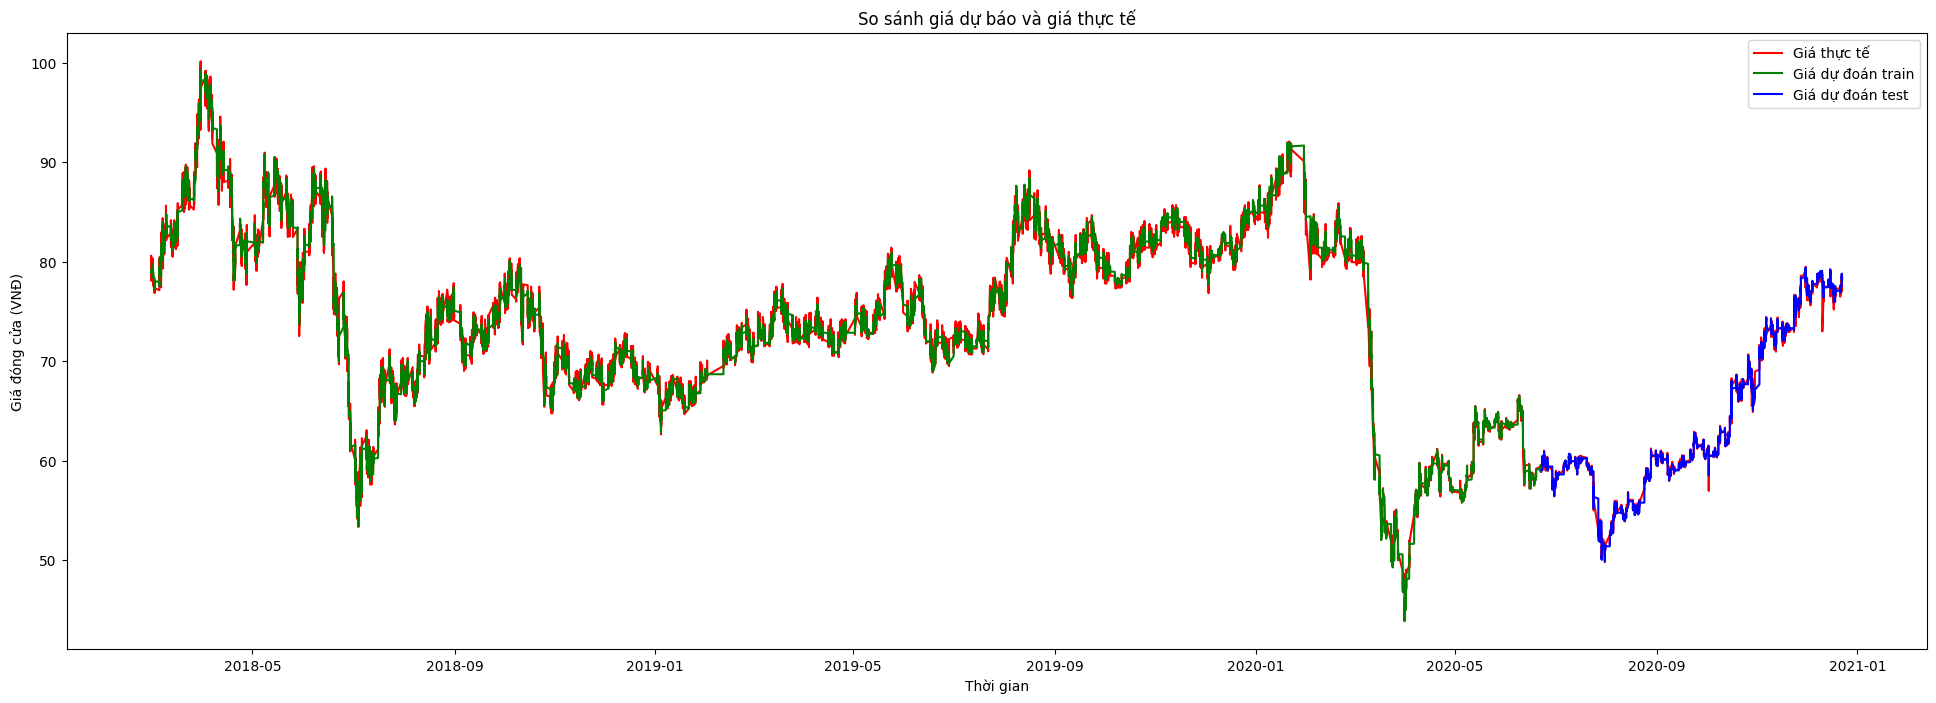

In [ ]:
# Lập biểu đồ so sánh
train_data1 = df1[60:train_size]
test_data1 = df1[train_size:]

plt.figure(figsize=(24, 8))
plt.plot(df1,label='Giá thực tế', color='red') # Đường giá thực
train_data1['Dự đoán'] = y_train_predict # Thêm dữ liệu
plt.plot(train_data1['Dự đoán'], label='Giá dự đoán train', color='green') # Đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict # Thêm dữ liệu
plt.plot(test_data1['Dự đoán'], label='Giá dự đoán test', color='blue') # Đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') # Đặt tên biểu đồ
plt.xlabel('Thời gian') # Đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') # Đặt tên hàm y
plt.legend() # Chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:', r2_score(y_train, y_train_predict))

#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):', mean_absolute_error(y_train, y_train_predict))

#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:', mean_absolute_percentage_error(y_train, y_train_predict))

Độ phù hợp tập train: 0.9944691297771805
Sai số tuyệt đối trung bình trên tập train (VNĐ): 0.5417617127078319
Phần trăm sai số tuyệt đối trung bình tập train: 0.007048278956846093


In [ ]:
train_data1

,Close,Dự đoán
Date/Time,,
2018-02-28 10:40:00,78.61,78.955658
2018-02-28 10:41:00,78.61,78.953102
2018-02-28 10:42:00,78.61,78.950638
2018-02-28 10:43:00,78.37,78.948273
2018-02-28 10:45:00,78.61,78.890160
...,...,...
2020-06-22 14:22:00,59.00,58.997478
2020-06-22 14:23:00,59.00,58.996078
2020-06-22 14:24:00,59.00,58.995148


In [ ]:
#r2
print('Độ phù hợp tập test:', r2_score(y_test, y_test_predict))

#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):', mean_absolute_error(y_test, y_test_predict))

#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:', mean_absolute_percentage_error(y_test, y_test_predict))

Độ phù hợp tập test: 0.9993150251223086
Sai số tuyệt đối trung bình trên tập test (VNĐ): 0.14533130526723417
Phần trăm sai số tuyệt đối trung bình tập test: 0.002182070226234664


In [ ]:
test_data1

,Close,Dự đoán
Date/Time,,
2020-06-22 14:28:00,59.0,59.029453
2020-06-22 14:29:00,59.0,59.014614
2020-06-22 14:46:00,59.1,59.008186
2020-06-23 09:15:00,59.5,59.038116
2020-06-23 09:16:00,59.1,59.197815
...,...,...
2020-12-22 14:22:00,78.2,78.553764
2020-12-22 14:23:00,78.2,78.543945
2020-12-22 14:24:00,78.2,78.536392


# Dự đoán biến động giá cổ phiếu

1/1 [==============================] - 1s 826ms/step


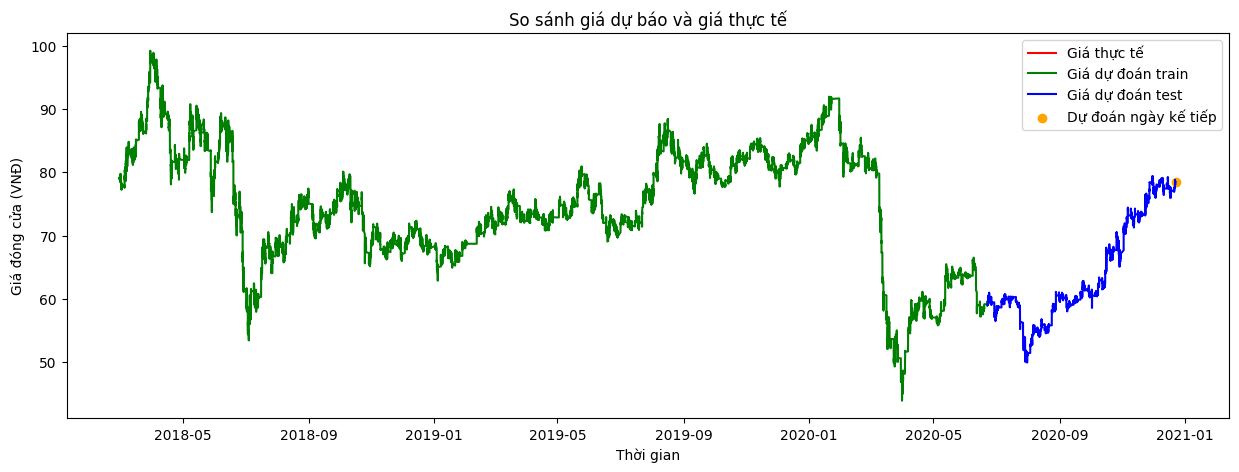

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Date/Time'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Close'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Date/Time': [next_date], 'Close': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Date/Time'], df1['Close'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('Giá dự báo')
plt.legend()
plt.show()

In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Close'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Date/Time': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

# Biến động giá cổ phiếu = Giá cổ phiếu N phút sau - Giá cổ phiếu hiện tại
stock_price_fluctuations = y_next_predict[0][0] - actual_closing_price
print("Biến động giá cổ phiếu:", stock_price_fluctuations)

            Date/Time  Giá dự đoán  Giá ngày trước
0 2020-12-23 14:46:00    78.525803            78.3
Biến động giá cổ phiếu: 0.22580261230469034
